In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('AMZN.csv',index_col=0,parse_dates=True)
df=df.dropna()

In [23]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .7 ))

training_data_len

882

In [24]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02635618],
       [0.0290846 ],
       [0.02986837],
       ...,
       [0.97097114],
       [0.97120068],
       [0.9449921 ]])

In [25]:
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()


[array([0.02635618, 0.0290846 , 0.02986837, 0.0258446 , 0.02416885,
       0.02683823, 0.03835535, 0.04149695, 0.04228401, 0.04428112,
       0.04738012, 0.04716697, 0.0479704 , 0.04697348, 0.0521024 ,
       0.05692305, 0.05814296, 0.05687057, 0.05824462, 0.06269471,
       0.060186  , 0.0525615 , 0.05435203, 0.05287304, 0.05951045,
       0.05876605, 0.06112062, 0.06457706, 0.06200605, 0.0633801 ,
       0.06269799, 0.05992365, 0.06460002, 0.06359982, 0.06039916,
       0.06249467, 0.06157318, 0.06403269, 0.05992037, 0.05911038,
       0.05184005, 0.05766417, 0.05790358, 0.06352111, 0.06184209,
       0.05970722, 0.05982856, 0.05938257, 0.05956293, 0.0592645 ,
       0.06333419, 0.06948953, 0.06788265, 0.06356047, 0.05080377,
       0.04975437, 0.04938054, 0.04127724, 0.04098538, 0.04449101])]
[0.044540205056192245]

[array([0.02635618, 0.0290846 , 0.02986837, 0.0258446 , 0.02416885,
       0.02683823, 0.03835535, 0.04149695, 0.04228401, 0.04428112,
       0.04738012, 0.04716697, 0.0

In [26]:
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [27]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(822, 60, 1)

In [28]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [29]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [30]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=3)

Epoch 1/3
822/822 [==============================] - 34s 41ms/step - loss: 0.0012
Epoch 2/3
822/822 [==============================] - 34s 41ms/step - loss: 4.4264e-04
Epoch 3/3
822/822 [==============================] - 33s 41ms/step - loss: 3.4306e-04


In [31]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [32]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [33]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
x_test

array([[[0.37973294],
        [0.38462247],
        [0.38975135],
        ...,
        [0.44691052],
        [0.45286913],
        [0.45345282]],

       [[0.38462247],
        [0.38975135],
        [0.37903444],
        ...,
        [0.45286913],
        [0.45345282],
        [0.45242638]],

       [[0.38975135],
        [0.37903444],
        [0.36460199],
        ...,
        [0.45345282],
        [0.45242638],
        [0.46082813]],

       ...,

       [[0.81324729],
        [0.89026954],
        [0.8710689 ],
        ...,
        [0.88989237],
        [0.88820681],
        [0.91972137]],

       [[0.89026954],
        [0.8710689 ],
        [0.85848269],
        ...,
        [0.88820681],
        [0.91972137],
        [0.97097114]],

       [[0.8710689 ],
        [0.85848269],
        [0.82130797],
        ...,
        [0.91972137],
        [0.97097114],
        [0.97120068]]])

In [34]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [35]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

101.16016328645156

In [36]:
y_test.mean()

2206.9443226392573

In [37]:
predictions.mean()

2171.1345

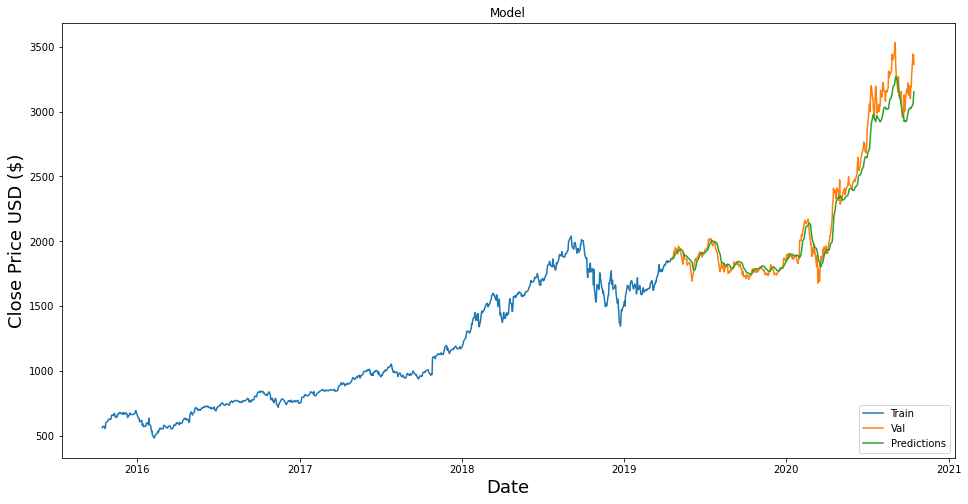

In [38]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [39]:
#Show the valid and predicted prices
valid


,Close,Predictions
Date,,
2019-04-18,1861.689941,1862.827026
2019-04-22,1887.310059,1866.339722
2019-04-23,1923.770020,1872.888306
2019-04-24,1901.750000,1885.043823
2019-04-25,1902.250000,1893.846802
...,...,...
2020-10-08,3190.550049,3029.709229
2020-10-09,3286.649902,3036.042725
2020-10-12,3442.929932,3058.046387
